In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Forest fires
Zbiór danych zawiera dane o pożarach lasów w Portugalii w Parku Narodowym Montesinho.

In [2]:
df = pd.read_csv('forest_fires_dataset.csv')

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


Do danych dołączona jest tabelka wyjaścniająca oznaczenia kolumn. Ze strony https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system, możemy dowiedzieć się co oznaczają poniższe skróty w systemie FWI (*Fire Weather Index*):
*  __FFMC:__ (*Fine Fuel Moisture Code*) represents fuel moisture of forest litter fuels under the shade of a forest canopy. It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag. It ranges from 0-101. Subtracting the FFMC value from 100 can provide an estimate for the equivalent (approximately 10h) fuel moisture content, most accurate when FFMC values are roughly above 80.
* __DMC:__ (*Duff Moisture Code*) represents fuel moisture of decomposed organic material underneath the litter. System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels. It is unitless and open ended. It may provide insight to live fuel moisture stress.
* __DC:__ (*Drought Code*) Represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels. It is unitless, with a maximum value of 1000. Extreme drought conditions have produced DC values near 800.
* __ISI:__ (*Initial Spread Index*) It integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential. ISI is a key input for fire behavior predictions in the FBP system. It is unitless and open ended.

In [4]:
with pd.option_context('display.max_colwidth', None):
    description = pd.read_csv('attributes_forest_fires.csv')
    display(description)

,name,type,description
0,X,integer,x-axis spatial coordinate within the Montesinho park map: 1 to 9
1,Y,integer,y-axis spatial coordinate within the Montesinho park map: 2 to 9
2,month,string,month of the year: 'jan' to 'dec'
3,day,string,day of the week: 'mon' to 'sun'
4,FFMC,float,FFMC index from the FWI system: 18.7 to 96.20
5,DMC,float,DMC index from the FWI system: 1.1 to 291.3
6,DC,float,DC index from the FWI system: 7.9 to 860.6
7,ISI,float,ISI index from the FWI system: 0.0 to 56.10
8,temp,float,temperature in Celsius degrees: 2.2 to 33.30
9,RH,float,relative humidity in %: 15.0 to 100


Nie brakuje żadnych danych.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


## Rozkłady cech:
* Rozkład wielkości desczu jest bardzo skośny. Jest tylko 8 rekordów z zarejestrowanym deszczem.
* Również rozkład powierzchi pożaru jest bardzo skośny. Połowa rekordów dotyczy pożaru gdzie nie spalił się żaden obszar (`area` równe 0) a większość pozostałych posiada małe wartości `area`.
* 

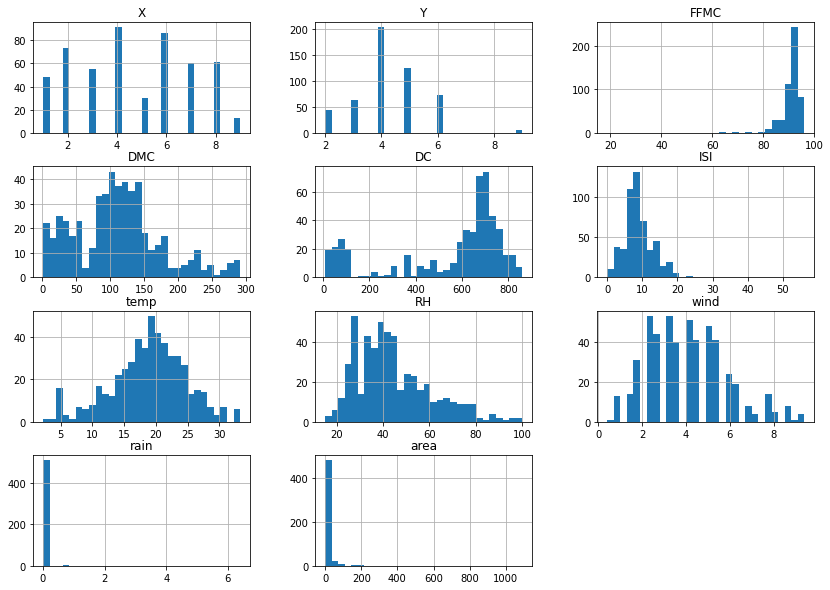

In [6]:
df.hist(bins=30, figsize=(14,10))
plt.show()

In [7]:
# tylko 8 rekordów z deszczem
df[df['rain']>0].shape

(8, 13)

In [8]:
# połowa liczba przypadków dotyczy pożarów gdzie nie spalił się żaden obszar
df[df['area']==0].shape

(247, 13)

W większości przypadków gdzie wystąpił pożar przyjmuje małe wartości i występują elementy odstające o dużo większej wartości.

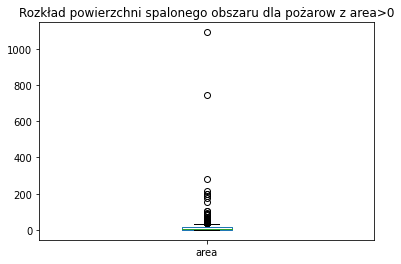

In [9]:
df[(df['area']>0)].area.plot.box()
plt.title('Rozkład powierzchni spalonego obszaru dla pożarow z area>0')
plt.show()

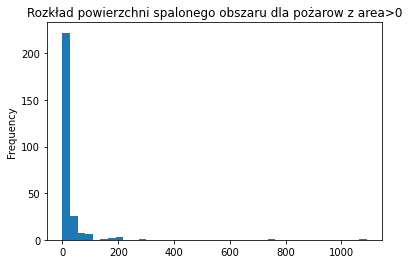

In [10]:
df[df['area']>0].area.plot.hist(bins=40)
plt.title('Rozkład powierzchni spalonego obszaru dla pożarow z area>0')
plt.show()

Dla mniejszych pożarów ze spaloną powierzchcnią większą niż 0, rozkład nadal jest bardzo skośny i koncentruje się przy najmniejszych wartościach.

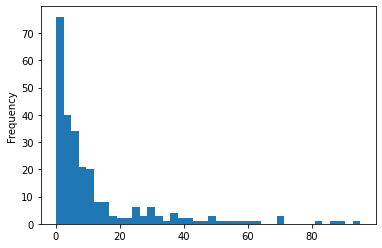

In [11]:
df[(df['area']>0)&(df['area']<100)].area.plot.hist(bins=40)
plt.show()

In [12]:
# oznaczmy największe pożary (area > 50), jest ich 24
df['is_bigfire'] = df['area'].apply(lambda x: True if x > 50 else False)
df[df['is_bigfire']].shape

(24, 14)

Wyrysujmy teraz kilka wykresów przedstawiające powiązania pomiędzy cechami. Wydzielone wyżej duże pożary oznaczymy na pomarańczowo oraz wielkość kropki powiążemy z `area`.

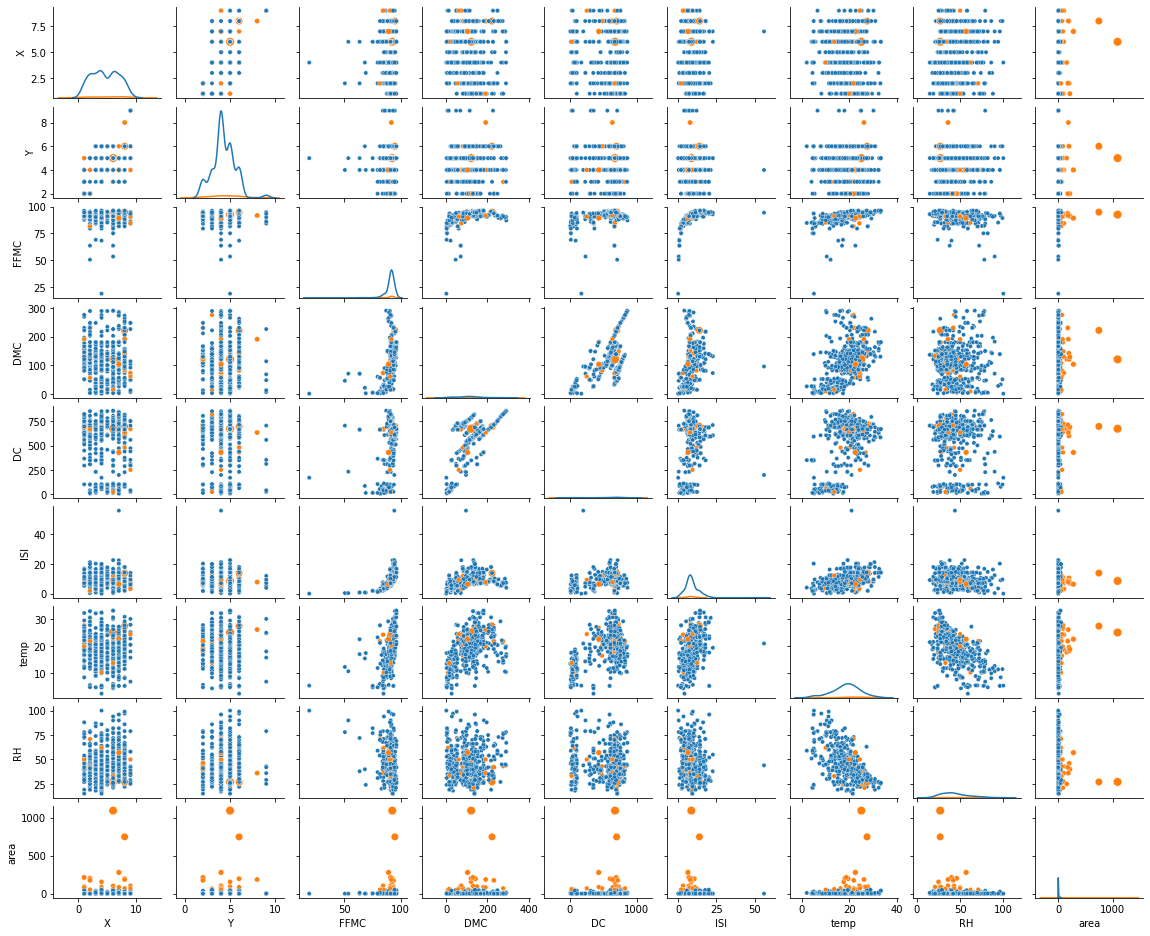

In [13]:
g = sns.PairGrid(df[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',  'area', 'is_bigfire']], hue="is_bigfire")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot, size=df['area'])
g.fig.set_size_inches(16,13)

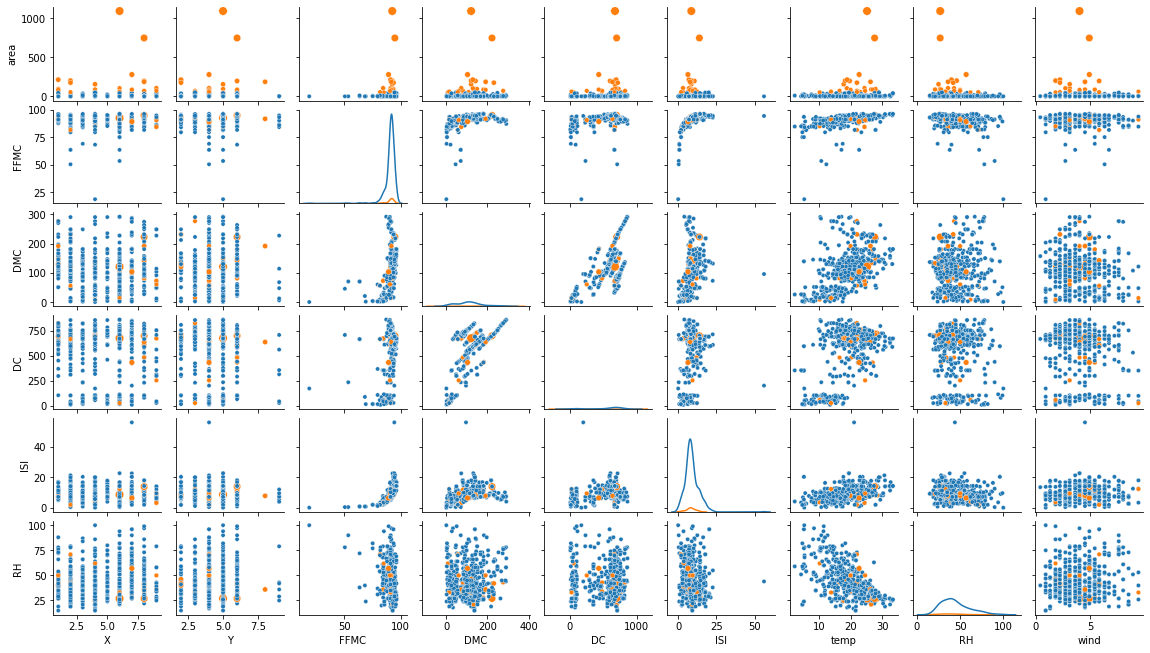

In [14]:
xvars=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']
yvars = ['area', 'FFMC', 'DMC', 'DC', 'ISI', 'RH']
g = sns.PairGrid(df, hue="is_bigfire", x_vars=xvars, y_vars=yvars)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot, size=df['area'])
g.fig.set_size_inches(16,9)

**Wnioski:**
* Największe pożary mają miejsce przy:
    * wskaźniku FFMC (*wilgotność śćiółki leśnej*) [75, 98]
    * ISI (*wskaźnik rozprzestrzeniania się*) [0, 15]
    * temperaturze [18, 30]C
    * wilgotności powietrza poniżej 50%
    * średnim wietrze [3, 5]m/s
* Wskaźniki ISI i FFMC wydają się zależeć od siebie wykładniczo.
* Wskaźniki DC i DMC wydająs się zależeć od siebie liniowo.
* Nie widać żadnej zależności pomiędzy współrzędnymi a wielkością spalonego obszaru. Jednak największe 24 pożary miały miejsce w 8 tych samych lokalizacjach.
* Jak można się spodziewać, im większa temperatura powietrza, tym mniejsza wilgotność względne powietrza.

### Mniejsze pożary

Odrzućmy teraz największe pożary by móc lepiej się przyjrzeć tym mniejszym. Niebieskie punkty to pożary z `area == 0`, pomarańczowe to te z `area > 0`.

In [15]:
df_small = df[~df['is_bigfire']].copy()
df_small.loc[:,'is_fire'] = df_small.loc[:,'area'].apply(lambda x: True if x > 0 else False)
print('Liczba pożarów które nie spaliły żadnego terenu oraz te które spaliły jakikolwiek obszar:')
df_small['is_fire'].value_counts()

Liczba pożarów które nie spaliły żadnego terenu oraz te które spaliły jakikolwiek obszar:


False    247
True     246
Name: is_fire, dtype: int64

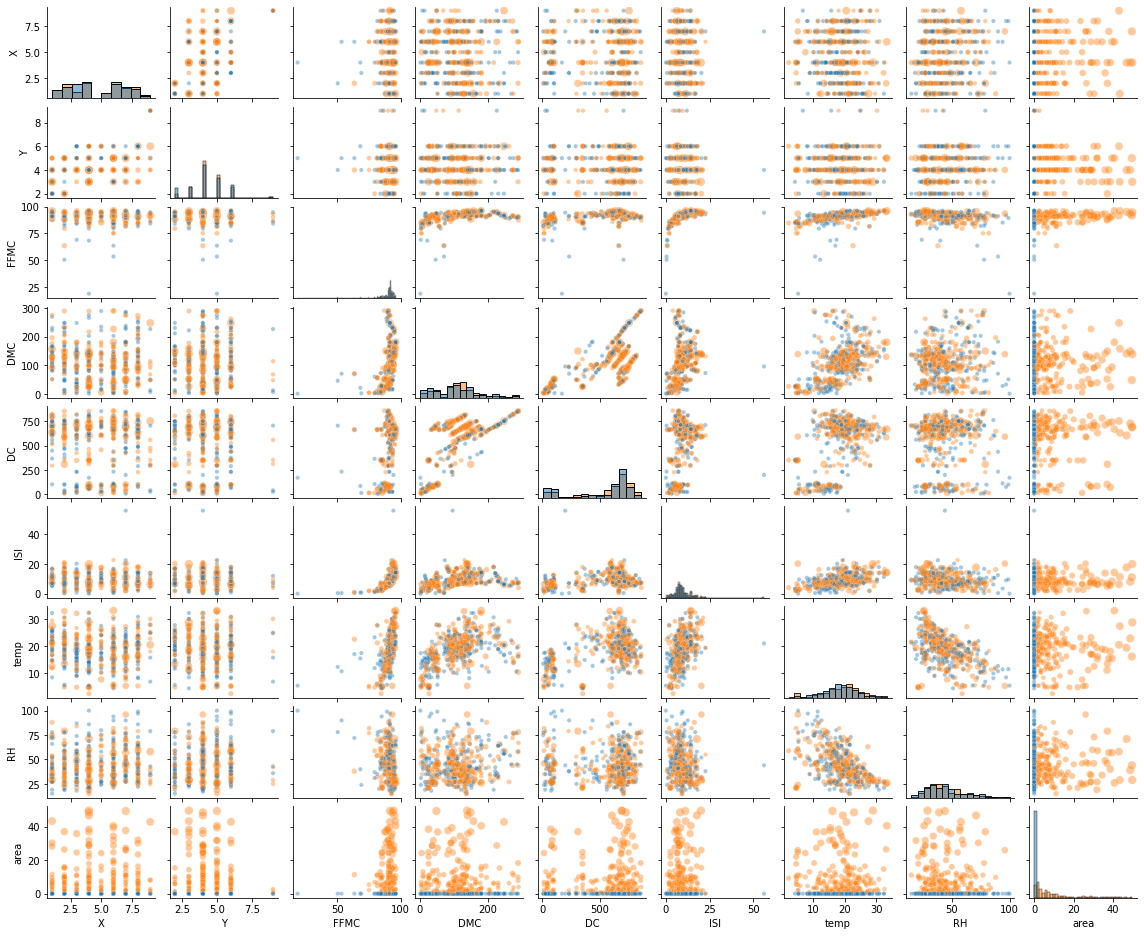

In [16]:
g = sns.PairGrid(df_small[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',  'area', 'is_fire']], hue="is_fire")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, size=df_small['area'], alpha=0.4)
g.fig.set_size_inches(16,13)

**Wnioski:**
* Nie widać wyraźnych znaczących rożnic pomiędzy wyszczególnionymi grupami.
* Na wykresie DMC/DC widać obszar w którym znajdują się głownie pożary, które spaliły jakąś powierzchnię lasu (*przy DC większym niż 500 i DMC mniejszym niż 200*).

## Liczba i wielkość pożarów na przestrzeni czasu
Sprawdźmy teraz częstość występowania pożarów na przestrzeni miesięcy oraz suma spalonych obszarów. Podczas sumowania spalonego obszaru odrzućmy największe pożary aby te pojedyczne przypadki nie zaburzyły wykresu.

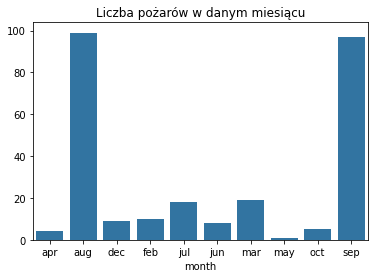

In [18]:
df['is_fire'] = df['area'].apply(lambda x: True if x > 0 else False)
month_fires = df[df['is_fire']].groupby('month')['month'].count()
df['month'] = pd.Categorical(df['month'], ordered=True,
              categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
sns.barplot(x=month_fires.index, y=month_fires.values, color='C0')
plt.title('Liczba pożarów w danym miesiącu')
plt.show()

In [19]:
print(month_fires)
print(196/month_fires.sum())

month
apr     4
aug    99
dec     9
feb    10
jul    18
jun     8
mar    19
may     1
oct     5
sep    97
Name: month, dtype: int64
0.725925925925926


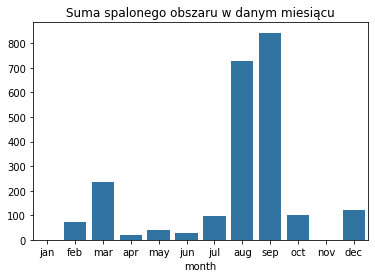

In [20]:
month_fires = df[~df['is_bigfire'] & (df['area'] > 0)].groupby('month')['area'].sum('area')
sns.barplot(x=month_fires.index, y=month_fires.values, color='C0')
plt.title('Suma spalonego obszaru w danym miesiącu')
plt.show()

Najwięcej pożarów występuje w sierpniu i wrześniu, aż 72% pożarów ma wtedy miejsce. Rozkład liczby pożarów na przestrzeni miesięcy wygląda bardzo podobnie do rozkładu sumy spalonego obszaru, więc największa powierzchnia lasów spaliła się również w sierpniu i wrześniu.

## Pandas profiling

Dalej użyjemy narzędzia Pandas Profiling, które służy do generowania raportu przedstawiającego podstawowe informacje o zbiorze danych i relacji pomiędzy kolumnami. Wygenerujmy raport w formie HTML.

In [21]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Forest Fires Report')

In [ ]:
profile.to_file("fires_report.html")

Raport zaczyna się od prostego przeglądu, wraz z bardzo przydatna zakładką o ostrzeżeniach. Prezentowane są tutaj ważne uwagi dotyczące poszczególnych kolumn i całej ramki danych. Tutaj na przykład wyświetlono informację o 4 zduplikowanych rzędach, czego wcześniej nie zauważliśmy. Widać również ostrzeżenia że kolumny `rain` i `area` składają się głownie z zer.
![](imgs/p1.png)

Dalej można się przyjrzeć dokładnie zależnościom pomiędzy kolumnami, jednak bez możliwości dzielenia na kategorie.
![](imgs/p2.png)

Przydatną funkcjonalnościa jest generowanie macierzy korelacji różnego typu i natychmiastowe przełączanie się między nimi. Widać tu zauważone wcześniej zależności, jednak część z nich jest przekłamana przez elementy odstające, które można zauważyć na generowanych wcześniej PairPlotach.
![](imgs/p3.png)

Ogólnie narzędzie dobrze nadaje się na sam początek ekploracji danych, wyświetlenie ostrzeżeń jest bardzo przydatne. Pomaga wskazać czemu przyjrzeć się dokładniej.